# Лабораторная работа №2
## Исследование модели системы биометрической аутентификации с использованием методов кластерного анализа
### Вариант №1
#### "Свой": Треугольное распределение
#### "Чужой": Треугольное распределение

In [75]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import triang

warnings.simplefilter(action='ignore', category=FutureWarning)

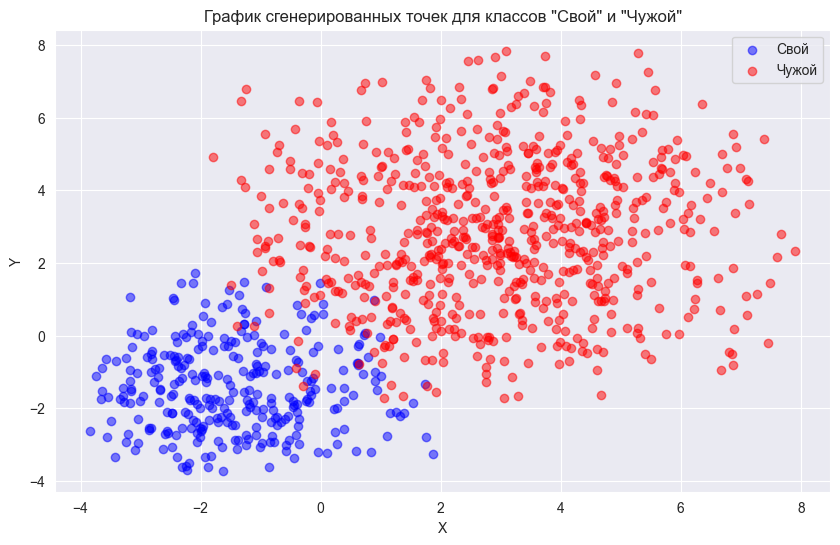

In [76]:
# Функция для генерации треугольного распределения
def generate_triangular_samples(num_samples, a, c, b):
    return triang.rvs(
        (c - a) / (b - a), 
        loc=a, 
        scale=b - a, 
        size=num_samples,
    )

# Шаг 1: Генерация данных
# Параметры для треугольного распределения (класс "Свой").
a_own, c_own, b_own = -4, -2, 2

# Параметры для треугольного распределения (класс "Чужой").
a_foreign, c_foreign, b_foreign = -2, 3, 8

# Количество выборок и размер каждой выборки
num_samples_own = 300
num_samples_foreign = 700

# Генерация выборок для классов "Свой" и "Чужой".
samples_own_x = generate_triangular_samples(
    num_samples_own, a_own, c_own, b_own,
)
samples_own_y = generate_triangular_samples(
    num_samples_own, a_own, c_own, b_own,
)
samples_foreign_x = generate_triangular_samples(
    num_samples_foreign, a_foreign, c_foreign, b_foreign,
)
samples_foreign_y = generate_triangular_samples(
    num_samples_foreign, a_foreign, c_foreign, b_foreign,
)


plt.figure(figsize=(10, 6))
plt.scatter(
    x=samples_own_x, 
    y=samples_own_y, 
    label='Свой', 
    color='blue', 
    alpha=0.5,
)
plt.scatter(
    x=samples_foreign_x, 
    y=samples_foreign_y, 
    label='Чужой', 
    color='red', 
    alpha=0.5,
)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('График сгенерированных точек для классов "Свой" и "Чужой"')
plt.grid(True)

## Установка порогов

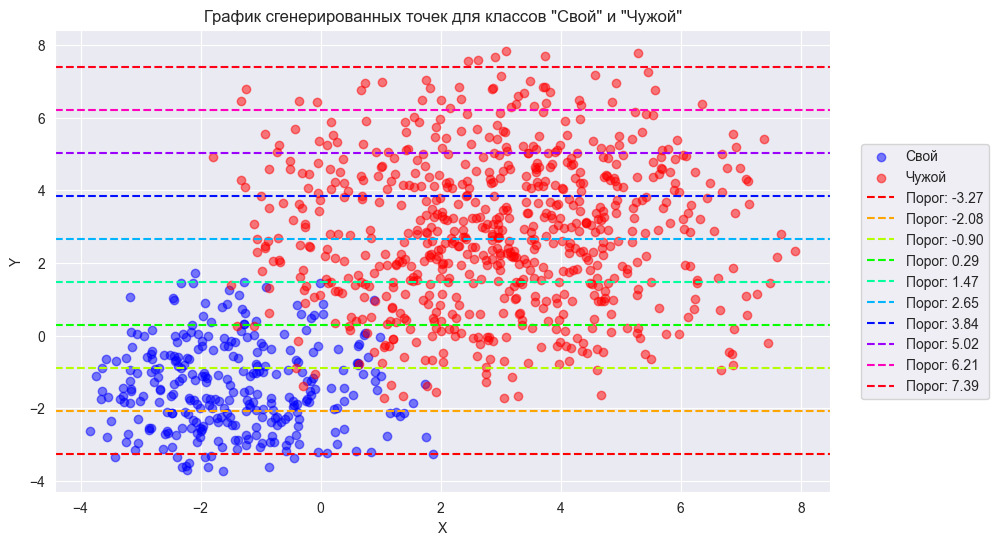

In [77]:
delta = 0.45
threshold_num = 10
thresholds = np.linspace(
    start=np.min(samples_own_y) + delta,
    stop=np.max(samples_foreign_y) - delta,
    num=threshold_num,
)

plt.figure(figsize=(10, 6))
plt.scatter(
    x=samples_own_x, 
    y=samples_own_y, 
    label='Свой', 
    color='blue', 
    alpha=0.5,
)
plt.scatter(
    x=samples_foreign_x, 
    y=samples_foreign_y, 
    label='Чужой', 
    color='red', 
    alpha=0.5,
)

threshold_colors = [
    plt.get_cmap('hsv')(i) 
    for i in np.linspace(0, 1, len(thresholds))
]
for i, threshold in enumerate(thresholds):
    plt.axhline(
        y=threshold, color=threshold_colors[i],
        linestyle='--', label=f'Порог: {threshold:.2f}',
    )

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=(1.04, 0.2))
plt.title('График сгенерированных точек для классов "Свой" и "Чужой"')
plt.grid(True)

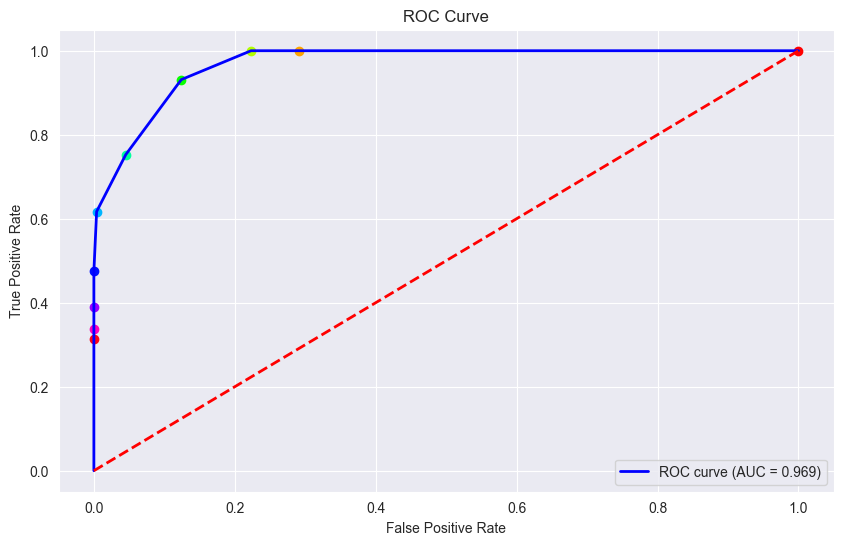

In [91]:
from sklearn.metrics import confusion_matrix, auc

# Шаг 2: Рассчет компонентов матрицы ошибок
def calculate_confusion_matrix(y_true, y_pred, threshold):
    y_pred_binary = (y_pred > threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred_binary)
    return cm.ravel()

# Создание массивов для истинных меток и предсказанных вероятностей
true_labels = np.concatenate([
    np.zeros(num_samples_own), 
     np.ones(num_samples_foreign),
])
predicted_probs = np.concatenate([
    samples_own_y, 
    samples_foreign_y,
])

# Шаг 3: Расчет компонентов матриц ошибок для различных порогов
components_matrix = np.array([
    calculate_confusion_matrix(
        true_labels, 
        predicted_probs, 
        threshold,
    )
    for threshold in thresholds
])

# Распаковка компонентов матрицы ошибок.
TP, FP, FN, TN = components_matrix.T

# Шаг 4: Построение ROC-кривой и расчет AUC
fpr = FP / (FP + TN)
tpr = TP / (TP + FN)

fpr = np.concatenate([[1], fpr, [0]])
tpr = np.concatenate([[1], tpr, [0]])

# Построение ROC-кривой
plt.figure(figsize=(10, 6))

for i, _ in enumerate(thresholds):
    plt.plot(
        [fpr[i]], [tpr[i]], 'o',
        color=threshold_colors[i],
    )
plt.plot(
    fpr, tpr, 
    color='blue', 
    lw=2, 
    label=f'ROC curve (AUC = {auc(fpr, tpr):.3f})',
)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [98]:
def rotate_points(x, y, angle):
    angle_rad = np.radians(angle)
    x_rotated = x * np.cos(angle_rad) - y * np.sin(angle_rad)
    y_rotated = x * np.sin(angle_rad) + y * np.cos(angle_rad)
    return x_rotated, y_rotated


In [99]:
# Углы поворота в градусах
angle1 = 22.3
angle2 = 76.4

# Поворот первой выборки
samples_own_x_rotated1, samples_own_y_rotated1 = rotate_points(samples_own_x, samples_own_y, angle1)

# Поворот второй выборки
samples_foreign_x_rotated1, samples_foreign_y_rotated1 = rotate_points(samples_foreign_x, samples_foreign_y, angle1)

# Повторный поворот первой выборки
samples_own_x_rotated2, samples_own_y_rotated2 = rotate_points(samples_own_x_rotated1, samples_own_y_rotated1, angle2)

# Повторный поворот второй выборки
samples_foreign_x_rotated2, samples_foreign_y_rotated2 = rotate_points(samples_foreign_x_rotated1, samples_foreign_y_rotated1, angle2)


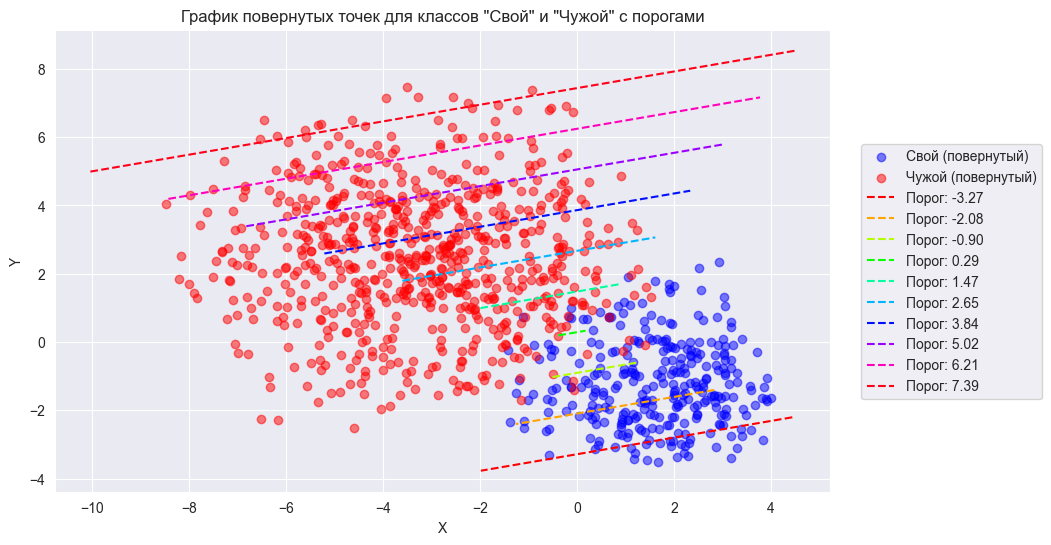

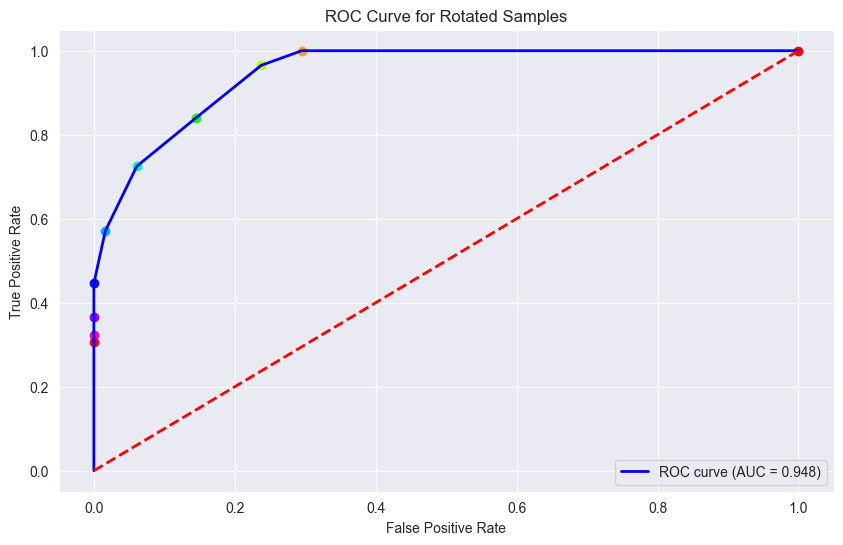

In [107]:
# Прямые порогов
threshold_lines_x = []
threshold_lines_y = []

for i, threshold in enumerate(thresholds):
    # Угол поворота
    angle_rad = np.radians(angle1 + angle2)
    
    # Расстояние от начала координат до прямой
    r = threshold
    
    # Координаты прямой
    line_x = np.linspace(-r, r, 1000)
    line_y = r * np.sin(angle_rad) + line_x * np.cos(angle_rad)
    
    # Поворот прямой
    line_x_rotated, line_y_rotated = rotate_points(line_x, line_y, angle1)
    
    # Добавление координат в список
    threshold_lines_x.append(line_x_rotated)
    threshold_lines_y.append(line_y_rotated)

# График повернутых точек для классов "Свой" и "Чужой"
plt.figure(figsize=(10, 6))
plt.scatter(
    x=samples_own_x_rotated2,
    y=samples_own_y_rotated2,
    label='Свой (повернутый)', 
    color='blue', 
    alpha=0.5,
)
plt.scatter(
    x=samples_foreign_x_rotated2,
    y=samples_foreign_y_rotated2,
    label='Чужой (повернутый)', 
    color='red', 
    alpha=0.5,
)

# Добавление прямых порогов
for i, threshold in enumerate(thresholds):
    plt.plot(
        threshold_lines_x[i], threshold_lines_y[i], 
        linestyle='--', color=threshold_colors[i],
        label=f'Порог: {threshold:.2f}',
    )

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=(1.04, 0.2))
plt.title('График повернутых точек для классов "Свой" и "Чужой" с порогами')
plt.grid(True)
plt.show()

# Расчет компонентов матриц ошибок для повернутых выборок
true_labels_rotated = np.concatenate([
    np.zeros(num_samples_own), 
     np.ones(num_samples_foreign),
])
predicted_probs_rotated = np.concatenate([
    samples_own_y_rotated2, 
    samples_foreign_y_rotated2,
])

# Расчет ROC-кривой и AUC для повернутых выборок
components_matrix_rotated = np.array([
    calculate_confusion_matrix(
        true_labels_rotated, 
        predicted_probs_rotated, 
        threshold,
    )
    for threshold in thresholds
])

TP_rotated, FP_rotated, FN_rotated, TN_rotated = components_matrix_rotated.T

fpr_rotated = FP_rotated / (FP_rotated + TN_rotated)
tpr_rotated = TP_rotated / (TP_rotated + FN_rotated)

# Добавление начальной и конечной точек к значениям FPR и TPR
fpr_rotated = np.concatenate([[1], fpr_rotated, [0]])
tpr_rotated = np.concatenate([[1], tpr_rotated, [0]])


# Сортировка результатов по FPR
# indices_rotated = np.argsort(fpr_rotated)
# fpr_rotated = fpr_rotated[indices_rotated]
# tpr_rotated = tpr_rotated[indices_rotated]

# Построение ROC-кривой для повернутых выборок с цветами порогов
plt.figure(figsize=(10, 6))
for i, _ in enumerate(thresholds):
    plt.plot(
        [fpr_rotated[i]], [tpr_rotated[i]], 'o',
        color=threshold_colors[i],
    )
plt.plot(
    fpr_rotated, tpr_rotated, 
    color='blue', 
    lw=2, 
    label=f'ROC curve (AUC = {auc(fpr_rotated, tpr_rotated):.3f})',
)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Rotated Samples')
plt.legend(loc='lower right')
plt.show()